In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from sklearn import preprocessing
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
path = r"C:\Users\hexie\OneDrive\Desktop\Sampling_codes\olp\\"
savepath = r"C:\Users\hexie\OneDrive\Desktop\Sampling_codes\plots\\"
pca_plots_path = r"C:\Users\hexie\OneDrive\Desktop\Projects\SAMPLING_DESKTOP\Sampling_codes\plotting\pca_plots\\"

dom = np.load("domains.npy", allow_pickle=True)
types = np.load("types.npy", allow_pickle=True)


auc_methods = ['aa', 'n2v_dot_prod', 'pa', 'n2v_edge_emb', 'jc', 'dcsbm', 'mod', 'spec', 'olp']



auc_aa = np.load("20auc_aa.npy", allow_pickle=True)
auc_prob = np.load("20auc_prob.npy", allow_pickle=True)
auc_pa = np.load("20auc_pa.npy", allow_pickle=True)
auc_emb = np.load("20auc_emb.npy", allow_pickle=True)
auc_olp = np.load("20auc_olp.npy", allow_pickle=True)
auc_jc = np.load("20auc_jc.npy", allow_pickle=True)
auc_gae = np.load("20auc_gae.npy", allow_pickle=True)
auc_dcsbm = np.load("20auc_dcsbm.npy", allow_pickle=True)
auc_mod = np.load("20auc_mod.npy", allow_pickle=True)
auc_spec = np.load("20auc_spec.npy", allow_pickle=True)



auc_aa_1 = np.load("auc_aa_wonan.npy", allow_pickle=True)
auc_prob_1 = np.load("auc_prob_wonan.npy", allow_pickle=True)
auc_pa_1 = np.load("auc_pa_wonan.npy", allow_pickle=True)
auc_emb_1 = np.load("auc_emb_wonan.npy", allow_pickle=True)
auc_olp_1 = np.load("auc_olp_wonan.npy", allow_pickle=True)
auc_jc_1 = np.load("auc_jc_wonan.npy", allow_pickle=True)
auc_gae_1 = np.load("auc_gae_wonan.npy", allow_pickle=True)
auc_dcsbm_1 = np.load("auc_dcsbm_wonan.npy", allow_pickle=True)
auc_mod_1 = np.load("auc_modularity_wonan.npy", allow_pickle=True)
auc_spec_1 = np.load("auc_spectral_wonan.npy", allow_pickle=True)


auc_aa_1 [np.isnan(auc_aa_1 )] = 0
auc_prob_1 [np.isnan(auc_prob_1 )] = 0
auc_pa_1 [np.isnan(auc_pa_1 )] = 0
auc_emb_1 [np.isnan(auc_emb_1 )] = 0
auc_olp_1 [np.isnan(auc_olp_1 )] = 0
auc_jc_1 [np.isnan(auc_jc_1 )] = 0
auc_dcsbm_1 [np.isnan(auc_dcsbm_1 )] = 0
auc_mod_1 [np.isnan(auc_mod_1 )] = 0
auc_spec_1 [np.isnan(auc_spec_1 )] = 0





Biological_index = [i for i, x in enumerate(dom) if x == "Biological"]
Economic_index = [i for i, x in enumerate(dom) if x == "Economic"]
Informational_index = [i for i, x in enumerate(dom) if x == "Informational"]
Social_index = [i for i, x in enumerate(dom) if x == "Social"]
Technological_index = [i for i, x in enumerate(dom) if x == "Technological"]
Transportation_index = [i for i, x in enumerate(dom) if x == "Transportation"]

sampling_methods = ['RandomNodeSampler', 'DegreeBasedSampler', 'PageRankBasedSampler', 'RandomEdgeSampler',
 'RandomNodeEdgeSampler', 'HybridNodeEdgeSampler',
 'RandomEdgeSamplerWithInduction', 'DiffusionSampler',
 'ForestFireSampler',
 'NonBackTrackingRandomWalkSampler', 'LoopErasedRandomWalkSampler',
 'RandomWalkSampler', 'RandomWalkWithRestartSampler','MetropolisHastingsRandomWalkSampler', 'CirculatedNeighborsRandomWalkSampler', 'BreadthFirstSearchSampler',
 'DepthFirstSearchSampler', 'RandomWalkWithJumpSampler',
 'RandomNodeNeighborSampler', 'ShortestPathSampler']



def plot_pca_samp(input_data, title, ax):
    pca = PCA(n_components=2)
    processed_data = preprocessing.scale(input_data)
    reduced_feat_matrix = pca.fit_transform(processed_data)
    pca.fit(reduced_feat_matrix)
    plt.rcParams.update({'font.size': 10})

    
    x = reduced_feat_matrix[:,0]
    y = reduced_feat_matrix[:,1]

    cm = plt.get_cmap('gist_rainbow')
    NUM_COLORS = len(sampling_methods)
    colors_list =[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
    #random.shuffle(colors_list)
    #colors_list = ['black']*20


    #ccc = ["lightblue", "bisque", "purple", "lightcoral"]
    cdict = {}
    mdict = {}

    mymarkers = ["o", "v","^","<",">","1","2","3","4","s","p","P","*","h","H","+","x","X","D","d","."]

    for i, txt in enumerate(sampling_methods):
        cdict[txt] = colors_list[i]
        mdict[txt] = mymarkers[i]
    
    for i, txt in enumerate(sampling_methods):
        ax.scatter(-x[i], y[i], c = cdict[txt], marker = mdict[txt], label = txt, s = 100)
   
    
    #ax.set_title(str(title))
    



In [2]:
print(len(Biological_index))
print(len(Economic_index))
print(len(Informational_index))
print(len(Social_index))
print(len(Technological_index))
print(len(Transportation_index))

119
9
12
74
26
10


In [3]:
print(len(Biological_index)/250)
print(len(Economic_index)/250)
print(len(Informational_index)/250)
print(len(Social_index)/250)
print(len(Technological_index)/250)
print(len(Transportation_index)/250)

0.476
0.036
0.048
0.296
0.104
0.04


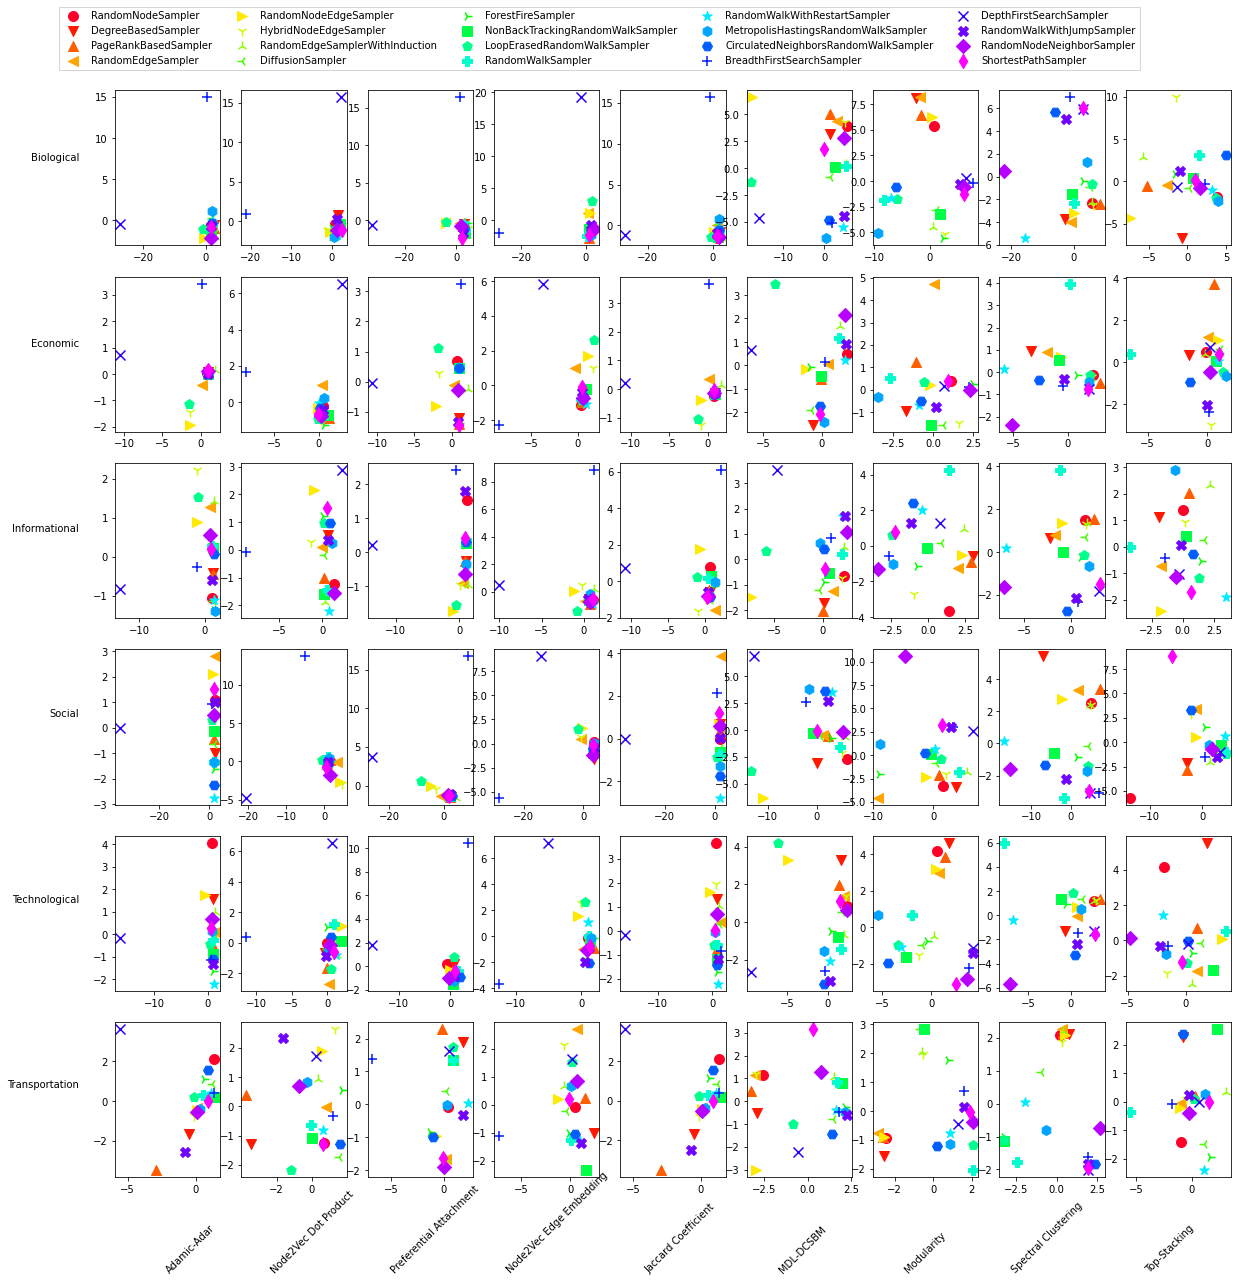

In [28]:
fig, axes = plt.subplots(nrows=6, ncols= 9, figsize=(20, 20))
ax = axes.flatten()

count = 0
for theReg in types:
    
    if theReg == types[0]:
        idx = Biological_index
    elif theReg  ==types[1]:
        idx = Economic_index
    elif theReg == types[2]:
        idx = Informational_index
    elif theReg == types[3]:
        idx = Social_index
    elif theReg  ==types[4]:
        idx = Technological_index
    elif theReg == types[5]:
        idx = Transportation_index
    
    auc_for_pca = auc_aa_1[idx].transpose()
    plot_pca_samp(auc_for_pca, "AA PCA for "+str(theReg), ax[count+0])
    auc_for_pca = auc_prob_1[idx].transpose()
    plot_pca_samp(auc_for_pca, "PROB PCA for "+str(theReg), ax[count+1])
    auc_for_pca = auc_pa_1[idx].transpose()
    plot_pca_samp(auc_for_pca, "PA PCA for "+str(theReg), ax[count+2])
    auc_for_pca = auc_emb_1[idx].transpose()
    plot_pca_samp(auc_for_pca, "EMB PCA for "+str(theReg), ax[count+3])
    auc_for_pca = auc_jc_1[idx].transpose()
    plot_pca_samp(auc_for_pca, "JC PCA for "+str(theReg), ax[count+4])
    auc_for_pca = auc_dcsbm_1[idx].transpose()
    plot_pca_samp(auc_for_pca, "DCSBM PCA for "+str(theReg), ax[count+5])
    auc_for_pca = auc_mod_1[idx].transpose()
    plot_pca_samp(auc_for_pca, "MOD PCA for "+str(theReg), ax[count+6])
    auc_for_pca = auc_spec_1[idx].transpose()
    plot_pca_samp(auc_for_pca, "SPEC PCA for "+str(theReg), ax[count+7])
    auc_for_pca = auc_olp_1[idx].transpose()
    plot_pca_samp(auc_for_pca, "OLP PCA for "+str(theReg), ax[count+8])    

    
    count = count+9


auc_methods = ['aa', 'n2v_dot_prod', 'pa', 'n2v_edge_emb', 'jc', 'dcsbm', 'mod', 'spec']

auc_methods = ["Adamic-Adar", "Node2Vec Dot Product", "Preferential Attachment", "Node2Vec Edge Embedding",
              "Jaccard Coefficient", "MDL-DCSBM", "Modularity", "Spectral Clustering", "Top-Stacking"]

start_point = 20
angles = 0
increment = 11
for inc,s in enumerate(auc_methods):        

    plt.text( -90 + inc*increment , -6, s,  fontsize=10,rotation= 45, horizontalalignment='center' )
    
start_point = 33
increment = 6.5
for inc,s in enumerate(types):        

    angle = -90
    plt.text(-100, start_point- inc*increment , s,fontsize=10, horizontalalignment='right' )
    
    
ax[26].legend(loc = 'lower center',bbox_to_anchor=(-5, 3.5), fancybox=False, shadow=False, ncol = 5)
fig.savefig("fig2-pcas"+".pdf", bbox_inches='tight')